In [2]:
%pip install nltk scikit-learn numpy pandas -q

Note: you may need to restart the kernel to use updated packages.


**Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

**Data Loading & Understanding**

In [4]:
# loading the dataset to a pandas dataframe
df = pd.read_csv("C:/Users/Sai kumar/OneDrive/Desktop/Mini Project/TeluguMovies_dataset.csv")

In [5]:
df.shape

(1400, 9)

In [6]:
df.head(2)

,Index,Movie,Year,Certificate,Genre,Overview,Runtime,Rating,No.of.Ratings
0,0,Bahubali: The Beginning,2015.0,UA,"Action, Drama","In ancient India, an adventurous and darin...",159,8.1,99114
1,1,Baahubali 2: The Conclusion,2017.0,UA,"Action, Drama","When Shiva, the son of Bahubali, learns ab...",167,8.2,71458


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          1400 non-null   int64  
 1   Movie          1400 non-null   object 
 2   Year           1352 non-null   float64
 3   Certificate    951 non-null    object 
 4   Genre          1389 non-null   object 
 5   Overview       1221 non-null   object 
 6   Runtime        1400 non-null   int64  
 7   Rating         1400 non-null   float64
 8   No.of.Ratings  1400 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 98.6+ KB


In [8]:
# filter the required columns for recommendation
required_columns = ["Movie", "Genre", "Overview", "Certificate","Rating"]

df = df[required_columns]

In [9]:
df.shape

(1400, 5)

In [10]:
df.head()

,Movie,Genre,Overview,Certificate,Rating
0,Bahubali: The Beginning,"Action, Drama","In ancient India, an adventurous and darin...",UA,8.1
1,Baahubali 2: The Conclusion,"Action, Drama","When Shiva, the son of Bahubali, learns ab...",UA,8.2
2,1 - Nenokkadine,"Action, Thriller",A rock star must overcome his psychologica...,UA,8.1
3,Dhoom:3,"Action, Thriller","When Sahir, a circus entertainer trained i...",UA,5.4
4,Ra.One,"Action, Adventure, Sci-Fi",When the titular antagonist of an action g...,U,4.6


In [11]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie        1400 non-null   object 
 1   Genre        1389 non-null   object 
 2   Overview     1221 non-null   object 
 3   Certificate  951 non-null    object 
 4   Rating       1400 non-null   float64
dtypes: float64(1), object(4)
memory usage: 54.8+ KB


In [12]:
df = df.dropna().reset_index(drop=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie        874 non-null    object 
 1   Genre        874 non-null    object 
 2   Overview     874 non-null    object 
 3   Certificate  874 non-null    object 
 4   Rating       874 non-null    float64
dtypes: float64(1), object(4)
memory usage: 34.3+ KB


In [19]:
df['combined'] = (
    df['Genre'].astype(str) + ' ' +
    df['Overview'].astype(str) + ' ' +
    df['Certificate'].astype(str) + ' ' +
    df['Rating'].astype(str)
)


In [20]:
df.head()

,Movie,Genre,Overview,Certificate,Rating,combined
0,Bahubali: The Beginning,"Action, Drama","In ancient India, an adventurous and darin...",UA,8.1,"Action, Drama In ancient India..."
1,Baahubali 2: The Conclusion,"Action, Drama","When Shiva, the son of Bahubali, learns ab...",UA,8.2,"Action, Drama When Shiva, the ..."
2,1 - Nenokkadine,"Action, Thriller",A rock star must overcome his psychologica...,UA,8.1,"Action, Thriller A rock star m..."
3,Dhoom:3,"Action, Thriller","When Sahir, a circus entertainer trained i...",UA,5.4,"Action, Thriller When Sahir, a..."
4,Ra.One,"Action, Adventure, Sci-Fi",When the titular antagonist of an action g...,U,4.6,"Action, Adventure, Sci-Fi When..."


In [21]:
df.tail()

,Movie,Genre,Overview,Certificate,Rating,combined
869,Screenplay of an Indian Love Story,Drama,An immensely successful film director is g...,A,8.9,Drama An immensely successful ...
870,Maavichiguru,Drama,"Maavichiguru is a 1996 Indian Telugu film,...",U,6.4,Drama Maavichiguru is a 1996 I...
871,Billa Ranga,"Action, Crime, Family",Two local ne'er-do-wells enjoy a carefree ...,A,7.8,"Action, Crime, Family Two loca..."
872,Vicky Dada,"Action, Crime",This is the story of a law-abiding young m...,A,7.4,"Action, Crime This is the stor..."
873,9 Nelalu,Drama,"Surendra marries Savitri, an orphan. In a ...",U,7.3,Drama Surendra marries Savitri...


In [22]:
data = df[['Movie', 'combined']]

In [23]:
data.head()

,Movie,combined
0,Bahubali: The Beginning,"Action, Drama In ancient India..."
1,Baahubali 2: The Conclusion,"Action, Drama When Shiva, the ..."
2,1 - Nenokkadine,"Action, Thriller A rock star m..."
3,Dhoom:3,"Action, Thriller When Sahir, a..."
4,Ra.One,"Action, Adventure, Sci-Fi When..."


In [24]:
data.shape

(874, 2)

In [25]:
# WordCloud for movie content
combined_text = " ".join(df['combined'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(combined_text)

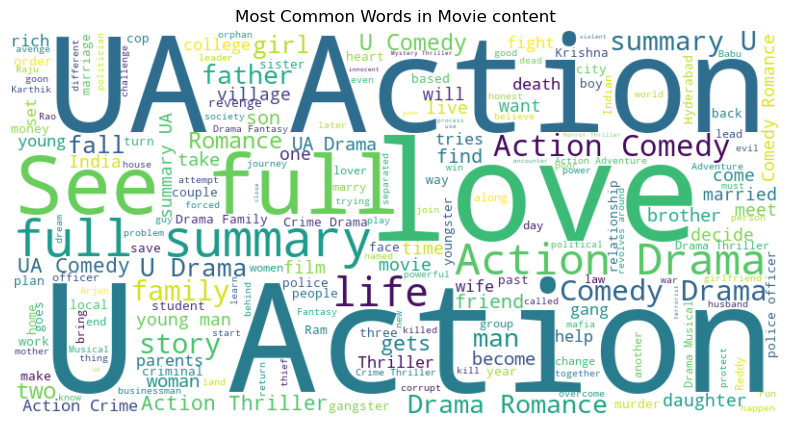

In [26]:
# WordCloud to visualize the most common words in the movie content
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Movie content")
plt.show()

In [27]:
# download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Sai
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Sai
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sai
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
stop_words = set(stopwords.words('english'))

In [29]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [30]:
# Apply preprocessing to the movie content
data['cleaned_text'] = df['combined'].apply(preprocess_text)

C:\Users\Sai kumar\AppData\Local\Temp\ipykernel_31268\802455668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = df['combined'].apply(preprocess_text)


In [31]:
data.head()

,Movie,combined,cleaned_text
0,Bahubali: The Beginning,"Action, Drama In ancient India...",action drama ancient india adventurous daring ...
1,Baahubali 2: The Conclusion,"Action, Drama When Shiva, the ...",action drama shiva son bahubali learns heritag...
2,1 - Nenokkadine,"Action, Thriller A rock star m...",action thriller rock star must overcome psycho...
3,Dhoom:3,"Action, Thriller When Sahir, a...",action thriller sahir circus entertainer train...
4,Ra.One,"Action, Adventure, Sci-Fi When...",action adventure scifi titular antagonist acti...


In [32]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

In [33]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [34]:
print(cosine_sim[1])

[0.01973759 1.         0.01543787 0.01039032 0.01032471 0.01131978
 0.01806238 0.00515906 0.01038639 0.01472973 0.04363052 0.01574579
 0.01616223 0.01258828 0.04802439 0.01391765 0.00525661 0.0703211
 0.0060306  0.0479829  0.07027802 0.01070799 0.0054778  0.01675154
 0.01474804 0.04794142 0.01501988 0.03785359 0.01768585 0.00642248
 0.01146869 0.00509096 0.01252334 0.06174189 0.08310358 0.01469876
 0.00640046 0.00639255 0.00688123 0.01283034 0.01159825 0.05302729
 0.00549119 0.00954054 0.0062654  0.00485863 0.050697   0.01597265
 0.00492571 0.0181537  0.00982088 0.00534655 0.02116536 0.08213899
 0.01774229 0.06002797 0.02330824 0.01536807 0.00494383 0.0150887
 0.05171719 0.02144816 0.02745045 0.01297491 0.01992246 0.01591372
 0.00802718 0.00858408 0.00526993 0.01211158 0.01577099 0.00885968
 0.00401312 0.13361426 0.0118428  0.00631484 0.0348068  0.00530822
 0.01871529 0.01208917 0.00457817 0.00990509 0.00466655 0.05428986
 0.01829955 0.03522614 0.00458843 0.00586508 0.08915208 0.006780

In [35]:
# Recommendation Function
def recommend_movies(movie_name, cosine_sim=cosine_sim, df=data, top_n=5):
    # Find the index of the movie
    idx = df[df['Movie'].str.lower() == movie_name.lower()].index
    if len(idx) == 0:
        return "Movie not found in the dataset!"
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return top n similar movies
    return df[['Movie']].iloc[movie_indices]

In [36]:
data["Movie"]

0                 Bahubali: The Beginning
1             Baahubali 2: The Conclusion
2                         1 - Nenokkadine
3                                 Dhoom:3
4                                  Ra.One
                      ...                
869    Screenplay of an Indian Love Story
870                          Maavichiguru
871                           Billa Ranga
872                            Vicky Dada
873                              9 Nelalu
Name: Movie, Length: 874, dtype: object

In [37]:
# row_index = df[df['title'] == "Avengers: Age of Ultron"].index
row_index = df[df['Movie'] == "Dhoom:3"].index
print(row_index)

Index([3], dtype='int64')


In [38]:
movie_name = data["Movie"][3]
print(movie_name)

Dhoom:3


In [39]:
# Example Recommendation
print(f"Recommendations for the Movie {movie_name}")
recommendations = recommend_movies(movie_name)
print(recommendations)

Recommendations for the Movie Dhoom:3
           Movie
611         Bhai
559  Arjun Reddy
844       Terror
415      Golimar
5        Dhoom:2
